In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
if not os.getcwd() == '/NN_project':
    os.chdir('..')

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

pd.set_option("display.max_columns", 101)

tensorboard_logs_dir = 'gcloud/logs/TensorBoard/'
logs = 'gcloud/logs/log.json'

In [2]:
pickle_file_test = 'data/preprocessed/VOC2012/preprocessed_test.pkl'
df_test = pd.read_pickle(pickle_file_test)

In [3]:
df_logs = pd.read_json(logs, lines=True)
df_logs = df_logs.join(pd.io.json.json_normalize(df_logs['parameters']))
df_logs = df_logs.join(pd.io.json.json_normalize(df_logs['val_metrics']))
df_logs = df_logs.drop(['parameters', 'val_metrics'], axis=1)
df_logs

log_name optimizer  learning_rate  epochs  batch_size  \
0   2019-11-30-09-42-27      adam         0.0010      30          64   
1   2019-11-30-10-23-58      adam         0.0010      30          64   
2   2019-11-30-11-05-08      adam         0.0010      30          64   
3   2019-11-30-11-46-23      adam         0.0010      30          64   
4   2019-11-30-12-27-19      adam         0.0010      30          64   
5   2019-11-30-13-08-27      adam         0.0010      30          64   
6   2019-11-30-13-49-20      adam         0.0010      30          64   
7   2019-11-30-14-30-22      adam         0.0010      30          64   
8   2019-12-01-09-57-43      adam         0.0010      50          64   
9   2019-12-01-11-14-48      adam         0.0010      20          64   
10  2019-12-01-11-54-07      adam         0.0010      20          64   
11  2019-12-01-12-46-13      adam         0.0010      30          64   
12  2019-12-01-16-03-38      adam         0.0010      30          64   
13  2019-12-03-14-44-59       NaN            NaN       1          64   
14  2019-12-03-14-49-34      Adam         0.0010       1          64   
15  2019-12-03-21-37-40      Adam         0.0001      30          64   
16  2019-12-04-08-18-42      Adam         0.0001      30          64   
17  2019-12-04-10-39-00      Adam         0.0001      30          64   
18  2019-12-04-13-02-24      Adam         0.0001      30          64   
19  2019-12-04-15-30-45      Adam         0.0002      30          64   
20  2019-12-04-20-21-55      Adam         0.0001      30          64   
21  2019-12-04-22-55-03      Adam         0.0002     120          64   
22  2019-12-05-08-43-04      Adam         0.0002      50          64   
23  2019-12-05-12-56-52       SGD         0.0010      50          64   
24  2019-12-05-17-59-49       SGD         0.0100      50          64   
25  2019-12-06-09-24-37      Adam         0.0008      30          64   
26  2019-12-06-12-59-09      Adam         0.0008      30          64   
27  2019-12-06-14-08-11      Adam         0.0008      30          64   
28  2019-12-06-15-11-27      Adam         0.0008      30          64   
29  2019-12-06-16-14-08      Adam         0.0008      30          64   
30  2019-12-06-17-26-02       SGD         0.0800      30          64   
31  2019-12-06-18-43-52       SGD         0.4000      30          64   
32  2019-12-07-12-33-19       SGD         0.8000      30          64   
33  2019-12-07-14-54-42      Adam         0.0016      30          64   
34  2019-12-07-17-03-09      Adam         0.0008      30          64   
35  2019-12-07-19-42-51      Adam         0.0008      30          64   
36  2019-12-07-21-32-04      Adam         0.0008      30          64   
37  2019-12-08-08-52-46      Adam         0.0008      30          64   
38  2019-12-08-12-08-52      Adam         0.0004      30          64   
39  2019-12-08-14-31-14      Adam         0.0008      30          64   
40  2019-12-08-16-41-23      Adam         0.0008      30          64   
41  2019-12-09-20-05-03      Adam         0.0004      15          64   
42  2019-12-09-20-38-13      Adam         0.0001      30          64   
43  2019-12-09-21-36-20      Adam         0.0001      40          64   
44  2019-12-09-23-22-02      Adam         0.0001      30          64   
45  2019-12-10-00-24-12      Adam         0.0001      30          64   
46  2019-12-10-02-28-38      Adam         0.0001      30          64   
47  2019-12-10-04-32-18      Adam         0.0001      30          64   

    loss_koef_negative_box  loss_koef_position  loss_koef_size_coef  \
0                     0.15                 5.0                  5.0   
1                     0.20                 5.0                  5.0   
2                     0.25                 5.0                  5.0   
3                     0.30                 5.0                  5.0   
4                     0.35                 5.0                  5.0   
5                     0.40                 5.0              

In [ ]:
%load_ext tensorboard
%tensorboard --logdir gcloud/logs/TensorBoard/ --bind_all

In [4]:
#log_name='2019-12-06-15-11-27'#good
#log_name='2019-12-06-12-59-09' #not bad
#log_name = '2019-12-06-14-08-11'
#log_name = '2019-12-07-19-42-51'
#log_name = '2019-12-08-14-31-14' # best f1
#log_name = '2019-12-08-16-41-23'

log_name = '2019-12-09-23-22-02' #best

has_min_loss = True

config_file = 'gcloud/logs/configs/{}.yaml'.format(log_name)
model_weights = 'gcloud/models/{}.h5'.format(log_name)

if has_min_loss:
     model_weights_min_loss = 'gcloud/models/{}_min_loss.h5'.format(log_name)

In [5]:
from src.config import Config
config = Config(config_file)

{'BATCH_SIZE': 64, 'EPOCHS': 30, 'INPUT_SIZE': '(256,256)', 'CONV_BASE_SIZE': 32, 'DENSE_SIZE': 512, 'ACTIVATION': <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7f41c007de10>, 'LEARNING_RATE': 0.0001, 'OPTIMIZER': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f41326fbb00>, 'SCHEDULER': False, 'L1': 0, 'L2': 0.0002, 'REGULARIZER': <tensorflow.python.keras.regularizers.L1L2 object at 0x7f41326fb978>, 'BATCH_NORMALIZATION': False, 'YOLO_LAYERS_COUNTS': [2, 4, 4, 2], 'LOSS_NEGATIVE_BOX_COEF': 0.05, 'LOSS_POSITION_COEF': 5, 'LOSS_SIZE_COEF': 5, 'TRAIN_TEST_SPLIT': 0.1, 'VALIDATION_SPLIT': 0.1}


/NN_project/src/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(ymlfile)


In [6]:
from src.models.YOLOv3 import create_model
model = create_model(config)
model.load_weights(model_weights)

if has_min_loss:
    model_min_loss = create_model(config)
    model_min_loss.load_weights(model_weights_min_loss)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 18496       conv2d[0][0]                     
__________________________________________________________________________________________________
yolo_layer (YoloLayer)          (None, 128, 128, 64) 20576       conv2d_1[0][0]                   
______________________________________________________________________________________________

## Performance on test data

In [8]:
from src.models.DataGen import DataGenGrid
from src.models.metrics import precision, recall, true_positives, false_negative, positives
from src.models.losses import SumSquaredLoss
datagen = DataGenGrid()

loss = SumSquaredLoss(config.GRID_SIZE, config.LOSS_NEGATIVE_BOX_COEF, config.LOSS_POSITION_COEF, config.LOSS_SIZE_COEF)

print('Last Epoch model:')
pred = model.predict_generator(datagen.flow_test(df_test))
print('LOSS',K.mean(loss(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))
print('PRECISION',K.mean(precision(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))
print('RECALL', K.mean(recall(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))

if has_min_loss:
    print()
    print('Minimal validation loss model:')
    pred = model_min_loss.predict_generator(datagen.flow_test(df_test))
    print('LOSS',K.mean(loss(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))
    print('PRECISION',K.mean(precision(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))
    print('RECALL', K.mean(recall(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))

Last Epoch model:
Found 959 validated image filenames.
LOSS tf.Tensor(1.503412, shape=(), dtype=float32)
PRECISION tf.Tensor(0.45225924, shape=(), dtype=float32)
RECALL tf.Tensor(0.4894607, shape=(), dtype=float32)

Minimal validation loss model:
Found 959 validated image filenames.
LOSS tf.Tensor(1.4584454, shape=(), dtype=float32)
PRECISION tf.Tensor(0.4805179, shape=(), dtype=float32)
RECALL tf.Tensor(0.4837604, shape=(), dtype=float32)


Found 16 validated image filenames.


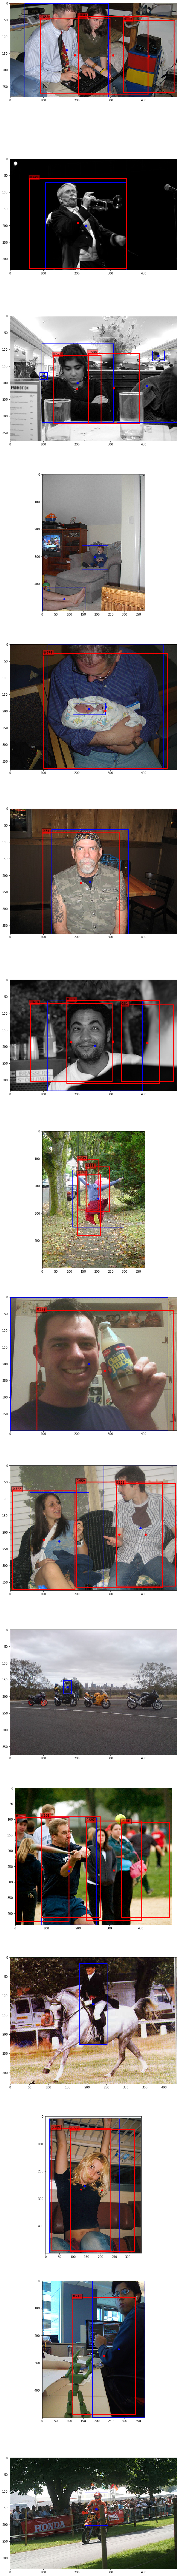

In [11]:
from src.data.VOC2012.plot import plot_grid_nms
num_predictions = 16
x_test = df_test.sample(num_predictions)

plot_last_epoch_model = False

plot_ground_truth = True
plot_grid=False
nms_iou_threshold=0.5
conf_threshold = 0.5

if has_min_loss and plot_last_epoch_model:
    subplots = 2
else:
    subplots=1

plt.subplots(num_predictions, subplots, figsize=(10, num_predictions*10))

if plot_last_epoch_model:
    pred = model.predict_generator(datagen.flow_test(x_test))
    for i in range(num_predictions):
        plt.subplot(num_predictions, subplots, i*subplots+1)
        plot_grid_nms(x_test, x_test.index[i], np.array(pred[i][0]), config, plot_ground_truth=plot_ground_truth, plot_grid=plot_grid, conf_threshold=conf_threshold, iou_threshold=nms_iou_threshold)

if has_min_loss:
    pred_min_loss = model_min_loss.predict_generator(datagen.flow_test(x_test))
    for i in range(num_predictions):
        if plot_last_epoch_model:
            plt.subplot(num_predictions, subplots, i*subplots+2)
        else:
            plt.subplot(num_predictions, subplots, i*subplots+1)
        plot_grid_nms(x_test, x_test.index[i], np.array(pred_min_loss[i][0]), config, plot_ground_truth=plot_ground_truth, plot_grid=plot_grid, conf_threshold=conf_threshold, iou_threshold=nms_iou_threshold) 
plt.show()